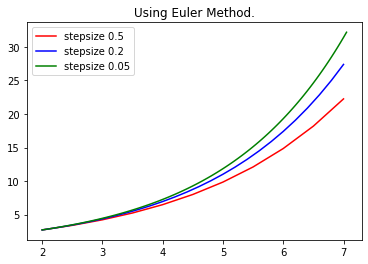

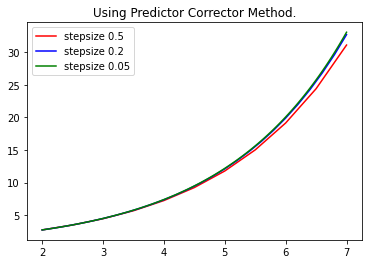

In [5]:

from the_quiver import *
import math
from matplotlib import pyplot as graph


f1 = lambda y, x: (y*math.log(y))/x
def f2(x,y):
    return(y*math.log(y))/x

def Euler_FOW(f, x_0, y_0, x_max, h):
    
    y = y_0; x = x_0
    X = [x_0]; Y = [y_0]
    
    while x < x_max:
        
        y += h*f(x, y) # using, y(x+h) \approx y(x) + hf(x,y)
        x += h
        Y.append(y)
        X.append(x)

    return X,Y

X,Y = Euler_FOW(f2,2,2.71828,7,0.5) # different step sizes (h)
A,B = Euler_FOW(f2,2,2.71828,7,0.2)
P,Q = Euler_FOW(f2,2,2.71828,7,0.05)    

def plotting1():
    graph.plot(X,Y,'-r', label = 'stepsize 0.5')
    graph.plot(A,B,'-b',label = 'stepsize 0.2')
    graph.plot(P,Q,'-g',label = 'stepsize 0.05')
    graph.title("Using Euler Method.")
    graph.legend()
    graph.show()
  
plotting1()

def PredCor(f, x_0, y_0, x_max, h):
    X = []
    for i in range(math.ceil((x_max-x_0)/h)+1):
        X.append(x_0)
        x_0 += h
    Y = []
    for i in range(len(X)):
        Y.append(0)
    Y[0] = y_0
    for i in range(0, len(X)-1): # Averaging the Euler step
        k_1 = h*f(Y[i], X[i])
        predict_y = k_1 + Y[i]
        k_2 = h*(f(predict_y, X[i + 1]))
        Y[i + 1] = Y[i] + ((k_1 + k_2)/2) # analogous to y(x+h) \approx y(x) + hf(x,y)
    return X, Y

X2,Y2 = PredCor(f1, 2, 2.71828, 7, 0.5)
A2,B2 = PredCor(f1, 2, 2.71828, 7, 0.2)
P2,Q2 = PredCor(f1, 2, 2.71828, 7, 0.05)

def plotting2():
    graph.plot(X2,Y2,'-r', label = 'stepsize 0.5')
    graph.plot(A2,B2,'-b',label = 'stepsize 0.2')
    graph.plot(P2,Q2,'-g',label = 'stepsize 0.05')
    graph.title("Using Predictor Corrector Method.")
    graph.legend()
    graph.show()
  
plotting2()



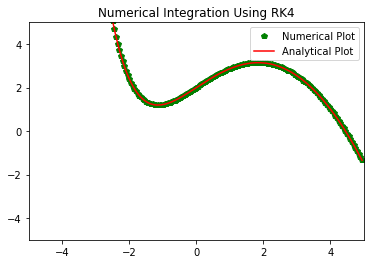

In [8]:
def RK4_2(f1, f2, x_0, x_max, h, y_0, z_0):
    X = []; Y = []; Z = []
    for i in range(math.ceil((x_max-x_0)/h)): # the X-values
        X.append(x_0)
        x_0 = x_0 + h
    for x in X: # the formulas (RK4) for two variables
        Y.append(y_0)
        Z.append(z_0)

        m1 = h*f1(y_0, z_0, x)
        k1 = h*f2(y_0, z_0, x)

        m2 = h*f1(y_0+0.5*m1, z_0+0.5*k1, x+0.5*h)
        k2 = h*f2(y_0+0.5*m1, z_0+0.5*k1, x+0.5*h)

        m3 = h*f1(y_0+0.5*m2, z_0+0.5*k2, x+0.5*h)
        k3 = h*f2(y_0+0.5*m2, z_0+0.5*k2, x+0.5*h)

        m4 = h*f1(y_0+m3, z_0+k3, x+h)
        k4 = h*f2(y_0+m3, z_0+k3, x+h)

        y_0 += (m1 + 2*m2 + 2*m3 + m4)/6
        z_0 += (k1 + 2*k2 + 2*k3 + k4)/6

    return X, Y

def f1(y, u, x):
    return u

def f2(y, u, x):
    return (1-u-x)

X1, Y1 = RK4_2(f1, f2, 0, 5, 0.05, 2, 1) # forward, all values from x = 0 upwards till x = 5
X2, Y2 = RK4_2(f1, f2, 0, -5, -0.05, 2, 1) # backward, all values from x = 0 downwards till x = -5


# Now to define the plot by analytical answer
x_min = -5.0; x_max = 5.0; h = 0.05
X_anal = []; Y_anal = []

for i in range(math.ceil((x_max-x_min)/h)):
    X_anal.append(x_min)
    x_min += h
for i in range(len(X_anal)):
    Y_anal.append(1 + 2*X_anal[i] - (1/2)*X_anal[i]**2 + (math.exp(-X_anal[i])))


graph.plot(X1, Y1, 'p', color = 'green', label = 'Numerical Plot')
graph.plot(X2, Y2, 'p', color = 'green')
graph.plot(X_anal, Y_anal, color = 'red', label = 'Analytical Plot')
graph.xlim(-5, 5)
graph.ylim(-5, 5)
graph.title('Numerical Integration Using RK4')
graph.legend()
graph.show()


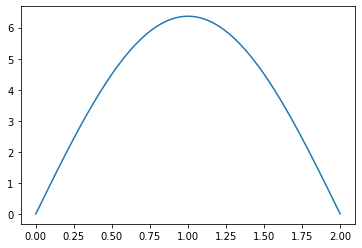

In [6]:
def f1(t, x, y):
    return -((math.pi)**2)*(x/4)  # ground state 
def f2(t, x, y):
    return y

X, Y, Z = SM(f1, f2, 0, 0, 2, 0, 10, 100,0.01) # Shooting Method, code is too long so I didn't paste it here. Check library.

graph.plot(X,Y)
graph.show()

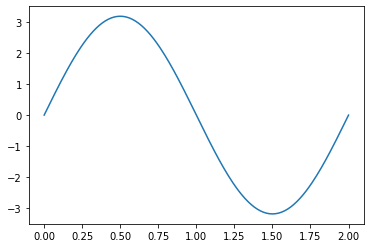

In [4]:
def f1(t, x, y):
    return -((math.pi)**2)*x # first excited state
def f2(t, x, y):
    return y

X, Y, Z = SM(f1, f2, 0, 0, 2, 0, 10, 100,0.01)

graph.plot(X,Y)
graph.show()